In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

## Iris Data

In [68]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
iris.groupby('class')["sepal-length"].agg(["mean", "std", "min", "max"])

,mean,std,min,max
class,,,,
Iris-setosa,5.006,0.352490,4.3,5.8
Iris-versicolor,5.936,0.516171,4.9,7.0
Iris-virginica,6.588,0.635880,4.9,7.9


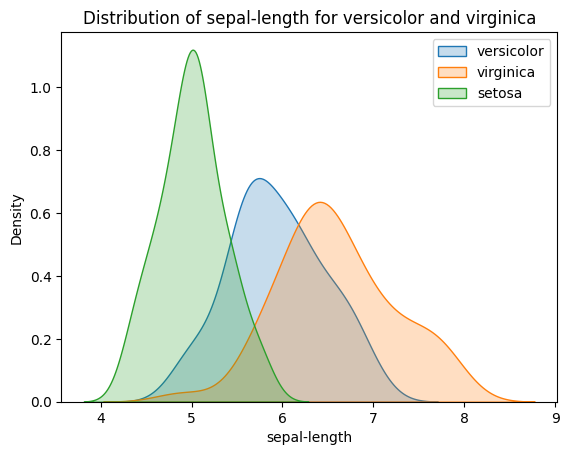

In [93]:
## Data for the versicolor and virginica classes

feature = "sepal-length"
versicolor_data = iris[iris["class"]=="Iris-versicolor"][feature]
virginica_data = iris[iris["class"]=="Iris-virginica"][feature]
setosa_data = iris[iris["class"]=="Iris-setosa"][feature]

# plot the data
sns.kdeplot(versicolor_data, fill=True)
sns.kdeplot(virginica_data, fill=True)
sns.kdeplot(setosa_data, fill=True)
plt.legend(["versicolor", "virginica", "setosa"])
plt.xlabel(feature)
plt.ylabel("Density")
plt.title(f"Distribution of {feature} for versicolor and virginica")
plt.show()

In [ ]:
# ANOVA test
statistic, p_value = stats.levene(versicolor_data, virginica_data)
print("Levene Test for Equality of Variances")
print("Statistic:", statistic)
print("P-Value:", p_value)
if p_value < 0.05:
    equal_var = False
    print("Reject Null Hypothesis: Variances are not equal")
else:
    equal_var = True
    print("Fail to Reject Null Hypothesis: Variances are equal")

Levene Test for Equality of Variances
Statistic: 1.024522457408365
P-Value: 0.31394122352493903
Fail to Reject Null Hypothesis: Variances are equal


In [100]:
se_versicolor = versicolor_data.std()/np.sqrt(len(versicolor_data))
se_virginica = virginica_data.std()/np.sqrt(len(virginica_data))
print(f"Standard Error of '{feature}':")
print("Versicolor: ", se_versicolor)
print("Virginica: ", se_virginica)

Standard Error of 'sepal-length':
Versicolor:  0.07299762366833928
Virginica:  0.08992695448449896


## Step by Step T-Test

In [73]:
# Standard Error Deviation

sed = np.sqrt(se_versicolor**2 + se_virginica**2)
print("Standard Error Deviation: ", sed)

Standard Error Deviation:  0.11582534353103226


In [77]:
# t-statistic

t_stat = abs(versicolor_data.mean() - virginica_data.mean())/sed
print("t-statistic: ", t_stat)

t-statistic:  5.629165259719801


In [78]:
p = 1 - stats.t.cdf(t_stat, df=len(versicolor_data)+len(virginica_data)-2)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)
print("p-value < 0.05: ", p_value < 0.05)
print("La hipótesis nula se rechaza, por lo que las medias de las dos especies son diferentes")

t-statistic:  5.629165259719801
p-value:  1.7248563024547942e-07
p-value < 0.05:  True
La hipótesis nula se rechaza, por lo que las medias de las dos especies son diferentes


## T-test in one line

In [181]:
alpha = 0.05
t_stat, p_value = stats.ttest_ind(virginica_data, versicolor_data, equal_var=equal_var)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)
print(f"p-value > {alpha}: ", p_value > alpha)
print("La hipótesis nula se rechaza, por lo que las medias de las dos especies son diferentes")

t-statistic:  5.629165259719801
p-value:  1.7248563024547942e-07
p-value > 0.05:  False
La hipótesis nula se rechaza, por lo que las medias de las dos especies son diferentes


critical t-value:  -1.984467454426692
t-statistic:  5.629165259719801


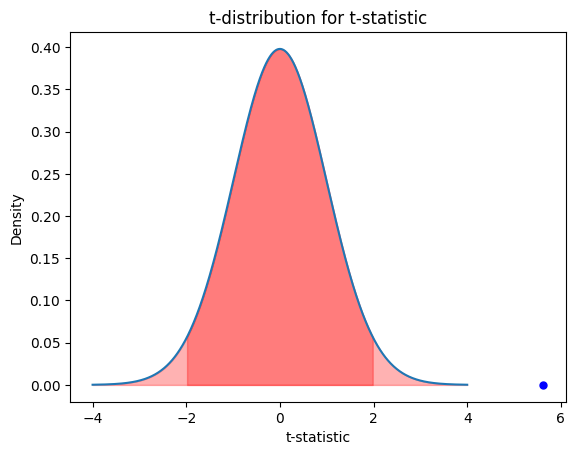

In [183]:
# degrees of freedom
df = len(versicolor_data) + len(virginica_data) - 2

# critical t-value for two-tailed test
critical_t = stats.t.ppf(1-alpha/2, df=df)
pd_critical_t = stats.t.pdf(critical_t, df=df)
print("critical t-value: ", -critical_t)
print("t-statistic: ", t_stat)

# Plot the t-distribution for the t-statistic
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=df)
plt.plot(x, y)

# Plot the t-distribution for the t-statistic
plt.fill_between(x, y, where=(x >= -critical_t), color="red", alpha=0.3)
plt.fill_between(x, y, where=(x <= critical_t), color="red", alpha=0.3)
plt.plot([t_stat], [0], color="blue", marker="o", markersize=5)
plt.xlabel("t-statistic")
plt.ylabel("Density")
plt.title("t-distribution for t-statistic")
plt.show()

## Shift the data for a new t-test

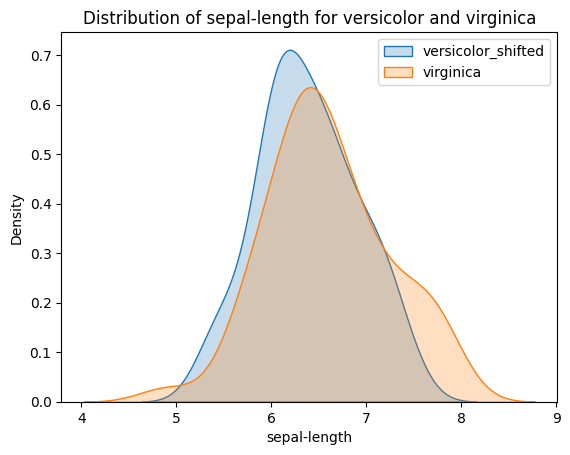

In [184]:
# Desplace the versicolor data
shift_value = 0.45
versicolor_data_shifted = versicolor_data + shift_value

# plot the data
sns.kdeplot(versicolor_data_shifted, fill=True)
sns.kdeplot(virginica_data, fill=True)
plt.legend(["versicolor_shifted", "virginica"])
plt.xlabel(feature)
plt.ylabel("Density")
plt.title(f"Distribution of {feature} for versicolor and virginica")
plt.show()

In [185]:
# Levene Test for Equality of Variances
_, p_value = stats.levene(versicolor_data, virginica_data)
if p_value < 0.05:
    equal_var = False
else:
    equal_var = True

critical t-value:  1.984467454426692
t-statistic:  1.7440051878272889
p-value:  0.0842937945261548
p-value > 0.05:  True
La hipótesis nula no se rechaza, por lo que las medias de las dos especies puede que sean iguales


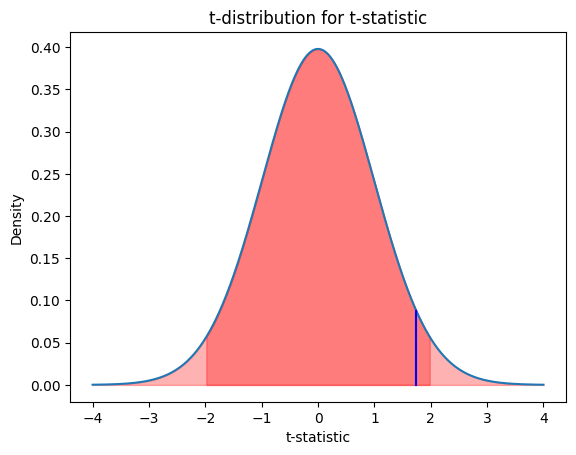

In [189]:
# t-test for sample mean difference of samples virsicolor and virginica

# degrees of freedom
df = len(versicolor_data_shifted) + len(virginica_data) - 2

# significance level
alpha = 0.05

# critical t-value for two-tailed test
critical_t = stats.t.ppf(1-alpha/2, df=df)
pd_critical_t = stats.t.pdf(critical_t, df=df)
print("critical t-value: ", critical_t)

# t-test
t_stat, p_value = stats.ttest_ind(virginica_data, versicolor_data_shifted, equal_var=equal_var)
pd_t_stat = stats.t.pdf(t_stat, df=df)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)
print(f"p-value > {alpha}: ", p_value > alpha)
if p_value < alpha:
    print("La hipótesis nula se rechaza, por lo que las medias de las dos especies son diferentes")
else:
    print("La hipótesis nula no se rechaza, por lo que las medias de las dos especies puede que sean iguales")

# Plot the t-distribution for the t-statistic
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=df)
plt.plot(x, y)

# Fill the area for the p-value
plt.fill_between(x, y, where=(x >= -critical_t), color="red", alpha=0.3)
plt.fill_between(x, y, where=(x <= critical_t), color="red", alpha=0.3)
plt.plot([t_stat, t_stat], [0, pd_t_stat], color="blue")
plt.xlabel("t-statistic")
plt.ylabel("Density")
plt.title("t-distribution for t-statistic")
plt.show()